<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/KDD_cup_2009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-7-d9cc61d6a283>:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.mean())


ValueError: ignored

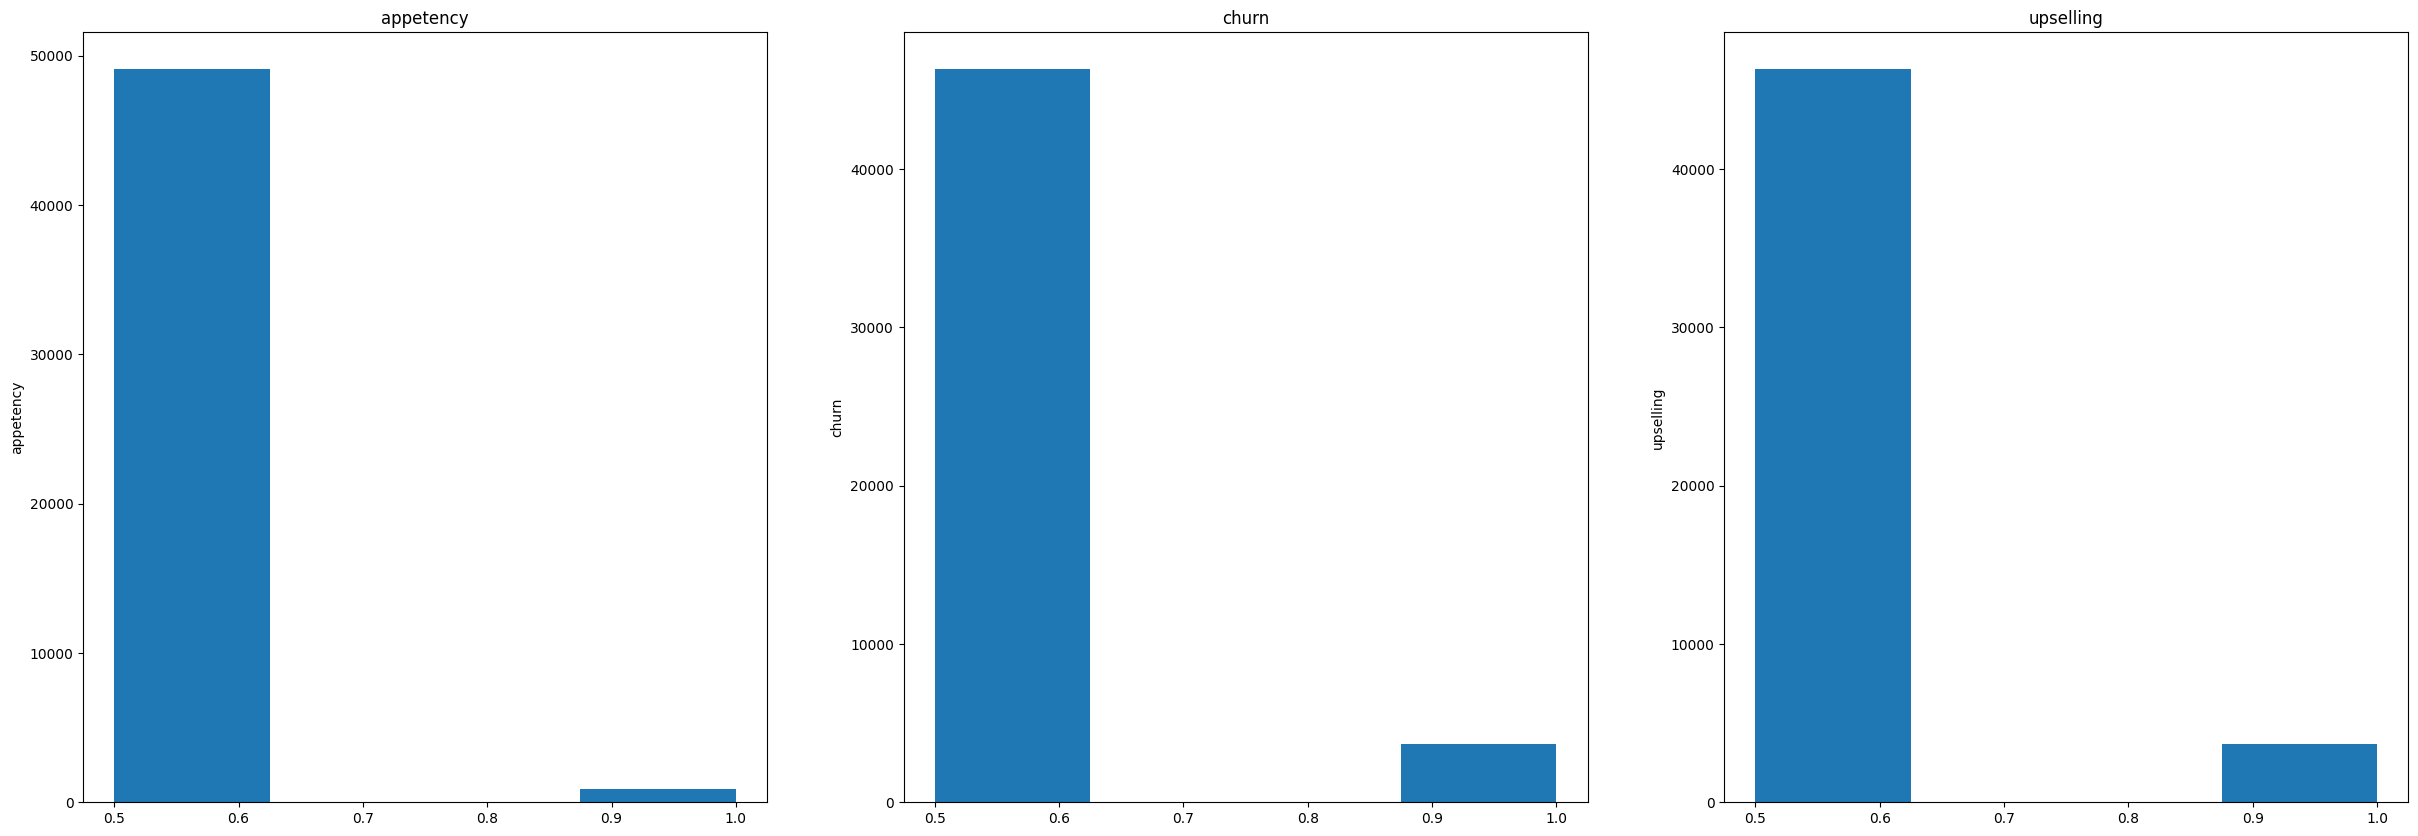

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score
)

# Read data
train = pd.read_table('orange_small_train.data')
test = pd.read_table('orange_small_test.data')
appetency = pd.read_table('orange_small_train_appetency.labels', header=None).loc[:, 0].astype('category')
churn = pd.read_table('orange_small_train_churn.labels', header=None).loc[:, 0].astype('category')
upselling = pd.read_table('orange_small_train_upselling.labels', header=None).loc[:, 0].astype('category')

# Dataset Analysis
train.describe()

# Handling missing values and non-numerical columns
train = train.fillna(train.mean())
droplist = ['Var{}'.format(i) for i in range(train.shape[1] - 40, train.shape[1] + 1)]
train = train.drop(droplist, axis=1).fillna(0)

# Transform labels to 0 or 1
appetency = (appetency.cat.codes + 1) / 2
churn = (churn.cat.codes + 1) / 2
upselling = (upselling.cat.codes + 1) / 2


# Visualization
labels = pd.concat([appetency, churn, upselling], axis=1)
labels.columns = ['appetency', 'churn', 'upselling']
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

for ax, col in zip(axes, labels.columns):
    ax.hist(labels[col], bins=4)
    ax.set_ylabel(col)
    ax.set_title(col)

# Set up random seed for reproducibility
RANDOM_SEED = 42

# Combine data and labels
data = pd.concat([train, labels], axis=1)

# Upsample minority class for the 'appetency' column
datatrain = data.drop(['churn', 'upselling'], axis=1)
df_maj = datatrain[datatrain.appetency == 0]
df_min = datatrain[datatrain.appetency == 1]
df_min_upsampled = resample(df_min, replace=True, n_samples=df_maj.shape[0], random_state=RANDOM_SEED)
df_upsampled = pd.concat([df_maj, df_min_upsampled])

df_X = df_upsampled.drop(['appetency'], axis=1)
df_y = df_upsampled['appetency']


# Upsample minority class for the 'appetency' column
df_min_upsampled = resample(
    df_min,
    replace=True,
    n_samples=max(df_maj.shape[0], int(df_maj.shape[0] * 1.2)),  # Adjust the upsampling ratio
    random_state=RANDOM_SEED
)

# Combine majority and upsampled minority class
df_upsampled = pd.concat([df_maj, df_min_upsampled])

# Ensure there are enough samples for the specified test_size
if df_upsampled.shape[0] < 2:
    raise ValueError("Insufficient data after upsampling. Adjust parameters.")

# If there are enough samples, proceed with the train-test split
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop(['appetency'], axis=1),
                                                    df_upsampled['appetency'],
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# ...





# Continue with the train-test split
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop(['appetency'], axis=1),
                                                    df_upsampled['appetency'],
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=RANDOM_SEED)

# Standardize the features
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

# Build and train the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16, 8), learning_rate_init=0.01, max_iter=500)
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'], fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(y_test, predictions))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report

# Read data
train = pd.read_table('orange_small_train.data')
appetency = pd.read_table('orange_small_train_appetency.labels', header=None).loc[:, 0].astype('category')

# Dataset Analysis
train.describe()

# Handling missing values and non-numerical columns
train = train.fillna(train.mean())
droplist = ['Var{}'.format(i) for i in range(train.shape[1] - 40, train.shape[1] + 1)]
train = train.drop(droplist, axis=1).fillna(0)

# Transform labels to 0 or 1
appetency = (appetency + 1) / 2

# Combine data and labels
data = pd.concat([train, appetency], axis=1)

# Upsample minority class for the 'appetency' column
df_maj = data[data.appetency == 0]
df_min = data[data.appetency == 1]
df_min_upsampled = resample(df_min, replace=True, n_samples=max(df_maj.shape[0], 1000), random_state=RANDOM_SEED)
df_upsampled = pd.concat([df_maj, df_min_upsampled])

# Ensure there are enough samples for the specified test_size
if df_upsampled.shape[0] < 2:
    raise ValueError("Insufficient data after upsampling. Adjust parameters.")

# Continue with the train-test split
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop(['appetency'], axis=1),
                                                    df_upsampled['appetency'],
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# Standardize the features
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

# Build and train the AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, random_state=RANDOM_SEED)
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'], fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(y_test, predictions))


<ipython-input-9-aed91c833d35>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.mean())


TypeError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report

# Read data
train = pd.read_table('orange_small_train.data')
appetency = pd.read_table('orange_small_train_appetency.labels', header=None).loc[:, 0].astype('category')

# Dataset Analysis
train.describe()

# Handling missing values and non-numerical columns
train = train.fillna(train.mean())
droplist = ['Var{}'.format(i) for i in range(train.shape[1] - 40, train.shape[1] + 1)]
train = train.drop(droplist, axis=1).fillna(0)

# Transform labels to 0 or 1
appetency = (appetency.cat.codes + 1) / 2

# Combine data and labels
data = pd.concat([train, appetency], axis=1)
# Display the columns in your DataFrame
print(data.columns)

# Replace 'appetency' with the correct column name in your DataFrame
df_maj = data[data['Var1'] == 0]
df_min = data[data['Var1'] == 1]
df_min_upsampled = resample(df_min, replace=True, n_samples=max(df_maj.shape[0], 1000), random_state=RANDOM_SEED)
df_upsampled = pd.concat([df_maj, df_min_upsampled])



# Ensure there are enough samples for the specified test_size
if df_upsampled.shape[0] < 2:
    raise ValueError("Insufficient data after upsampling. Adjust parameters.")

# Continue with the train-test split
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop(['appetency'], axis=1),
                                                    df_upsampled['appetency'],
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# Standardize the features
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

# Build and train the AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, random_state=RANDOM_SEED)
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'], fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(y_test, predictions))


<ipython-input-15-02f3455a77fc>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.mean())


Index([  'Var1',   'Var2',   'Var3',   'Var4',   'Var5',   'Var6',   'Var7',
         'Var8',   'Var9',  'Var10',
       ...
       'Var181', 'Var182', 'Var183', 'Var184', 'Var185', 'Var186', 'Var187',
       'Var188', 'Var189',        0],
      dtype='object', length=190)


ValueError: ignored

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

''' Desafio KDD 2009 '''

# Imports
import argparse
import numpy as np
import pandas as pd

# Classifiers
from xgboost import XGBClassifier

# Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#
def arg_passing():
	''' Argument Parsing '''
	parser = argparse.ArgumentParser(description='KDD 2009 Challenge')

	# Main arguments
	parser.add_argument('-d', nargs=1, type=str, default=["data/orange_small_train.data"], help='Data file')
	parser.add_argument('-l', nargs=1, type=str, required=True, help='Labels file')
	parser.add_argument('-s', nargs=1, type=str, default=["\t"], help='Separator')
	parser.add_argument('-k', nargs=1, type=float, default=[10], help='Number of folds / Test Split Percentange')

	parser.add_argument('-p', nargs=1, type=float, help='Exclude nominal with x null percentange columns')
	parser.add_argument('-e', action='store_true', help='Exclude nominal columns')

	# XGBoost arguments
	parser.add_argument('--max_depth', nargs=1, type=int, default=[3], help='XGBoost.max_depth')
	parser.add_argument('--n_estimators', nargs=1, type=int, default=[100], help='XGBoost.n_estimators')
	parser.add_argument('--subsample', nargs=1, type=float, default=[1], help='XGBoost.subsample')
	parser.add_argument('--gamma', nargs=1, type=float, default=[0], help='XGBoost.gamma')

	#
	return parser.parse_args()

#
if __name__ == '__main__':
	''' Main '''
	args = arg_passing()

	# Parameters
	data = args.d[0]
	labels = args.l[0]
	sep = args.s[0]
	split = args.k[0]

	# Load data
	X_data = pd.read_table(data, sep=sep)
	y_data = pd.read_table(labels, sep=sep, header=None)

	# Data pre-processing
	X_data.fillna(0, inplace=True)

	if args.e:
		X_data = X_data.select_dtypes(exclude=['object'])
		print('Dropped all nominal columns')
	else:
		obj_columns = X_data.select_dtypes(include=['object']).columns
		X_data[obj_columns] = X_data[obj_columns].astype('category').apply(lambda x: x.cat.codes)

		if args.p is not None:
			total = len(X_data)
			drop_cols = []

			for i in obj_columns:
				if len(X_data[X_data[i] == 0]) / total > args.p[0]:
					drop_cols.append(i)

			X_data.drop(drop_cols, axis=1, inplace=True)
			print('Dropped {0} nominal columns. Percentage {1}'.format(len(drop_cols), args.p[0]))

	# Classifier
	classifier = XGBClassifier(
		max_depth=args.max_depth[0],
		n_estimators=args.n_estimators[0],
		subsample=args.subsample[0],
		gamma=args.gamma[0])

	# Split
	if split < 1.0:
		print('Running {0} split evaluation'.format(split))

		X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=split, random_state=1)
		classifier.fit(X_train, y_train.values.ravel())

		score = classifier.score(X_test, y_test)
		y_hat = classifier.predict(X_test)

		print('Split {0}, Score: {1}, ROC_AUC: {2}'.format(
			split, score, metrics.roc_auc_score(y_test, y_hat)))

	# K-fold
	else:
		print('Running {0} fold(s) cross-validation'.format(int(split)))

		k_fold = KFold(int(split))
		rocs, scores = [], []

		for k, (train, test) in enumerate(k_fold.split(X_data, y_data)):
			X_train, y_train = X_data.iloc[train], y_data.iloc[train]
			X_test, y_test = X_data.iloc[test], y_data.iloc[test]

			classifier.fit(X_train, y_train.values.ravel())

			score = classifier.score(X_test, y_test)
			y_hat = classifier.predict(X_test)
			roc = metrics.roc_auc_score(y_test, y_hat)

			scores.append(score)
			rocs.append(roc)

			print('Fold {0}, Score: {1}, ROC_AUC: {2}'. format(
				k + 1, score, roc))

		print('-')
		print('Score: {0}, ROC_AUC: {1}'.format(np.mean(score), np.mean(rocs)))

usage: colab_kernel_launcher.py [-h] [-d D] -l L [-s S] [-k K] [-p P] [-e] [--max_depth MAX_DEPTH]
                                [--n_estimators N_ESTIMATORS] [--subsample SUBSAMPLE]
                                [--gamma GAMMA]
colab_kernel_launcher.py: error: the following arguments are required: -l


SystemExit: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
trainData = pd.read_table('../input/orange_small_train.data').replace('\\', '/')
trainData.head(10)


FileNotFoundError: ignored

In [ ]:
trainData.tail(10)


In [ ]:
trainData.info()


In [ ]:
churn = pd.read_table('../input/orange_small_train_churn.txt').replace('\\', '/')
churn.head(10)

In [ ]:
trainData.describe()


In [ ]:
trainData.corr()


In [ ]:
trainData.dtypes
